In [15]:
import requests
import nltk, re, pprint, io, json
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import pickle

In [16]:
# Load TDIDF scores
#tfidf_repub = np.load("tdidf_repub.npy")
#tfidf_demo = np.load("tfidf_demo.npy")

TFIDF_repub = np.load("TFIDF_repub.npy")
TDIDF_demo = np.load("TFIDF_demo.npy")

# Load terms in most common order
file = open("repub_tokens_ordered.obj",'rb')
repub_tokens_ordered = pickle.load(file)
file.close()

file = open("demo_tokens_ordered.obj",'rb')
demo_tokens_ordered = pickle.load(file)
file.close()

* Combine all words together in one long string (separated by spaces), repeating each word according to its TF-IDF score (rounded up to the nearest integer value).

In [17]:
# Round scores
TFIDF_repub_round = np.array(TFIDF_repub, dtype="int32")
TFIDF_demo_round = np.array(TDIDF_demo, dtype="int32")

In [18]:
repub_wc_string = ""
for w,n in zip(repub_tokens_ordered, TFIDF_repub_round):
    repub_wc_string += (w + " ") * n

In [19]:
demo_wc_string = ""
for w,n in zip(demo_tokens_ordered, TFIDF_demo_round):
    demo_wc_string += (w + " ") * n

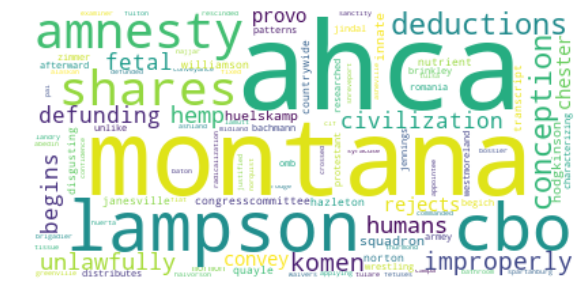

In [20]:
repub_wc = WordCloud(
    background_color="white", 
    max_words=4000, contour_width=3, 
    contour_color='steelblue', 
    collocations=False
).generate(repub_wc_string)

plt.figure(figsize=[10,5])
plt.imshow(repub_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

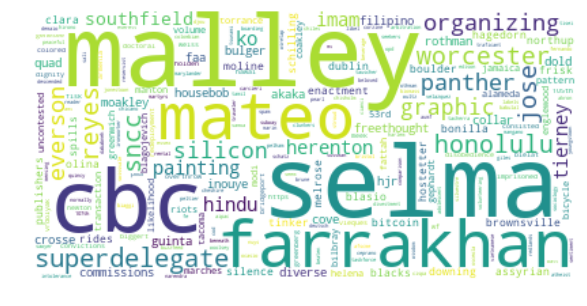

In [21]:
demo_wc = WordCloud(
    background_color="white", 
    max_words=4000, contour_width=3, 
    contour_color='steelblue', 
    collocations=False
).generate(demo_wc_string)

plt.figure(figsize=[10,5])
plt.imshow(demo_wc, interpolation='bilinear')
plt.axis("off")
plt.show()